In [339]:
import torch
from torch import nn
pool_h = nn.AdaptiveAvgPool2d((None, 1))
pool_w = nn.AdaptiveAvgPool2d((1, None))
conv1 = nn.Conv2d(1, 1, kernel_size=1, stride=1, padding=0, bias=True)

In [340]:
a = torch.rand((1, 1, 28, 28))
print(pool_w(a).shape)
print(pool_h(a).shape)

torch.Size([1, 1, 1, 28])
torch.Size([1, 1, 28, 1])


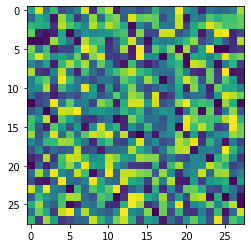

In [341]:
from matplotlib import pyplot as plt

plt.imshow(a[0,0])

In [342]:
n,c,h,w = a.size()

x_h = pool_h(a)
x_w = pool_w(a).permute(0, 1, 3, 2)

y = torch.cat([x_h, x_w], dim=2)
y = conv1(y)

In [343]:
x_h, x_w = torch.split(y, [h, w], dim=2)
x_w = x_w.permute(0, 1, 3, 2)

In [344]:
print(x_h.shape)
print(x_w.shape)

torch.Size([1, 1, 28, 1])
torch.Size([1, 1, 1, 28])


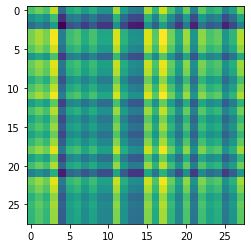

In [345]:
test = (x_h + x_w).detach()
plt.imshow(test[0,0])

torch.Size([1, 1, 28, 28])


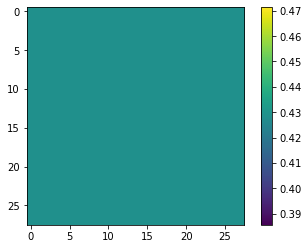

In [374]:
n,c,h,w = a.size()

x_h = pool_h(a)
x_w = pool_w(a)
# x_w = pool_w(a).permute(0, 1, 3, 2)



conv2 = nn.Conv2d(1, 1, kernel_size=1, stride=1, padding=0, bias=False)
conv3 = nn.Conv2d(1, 1, kernel_size=1, stride=1, padding=0, bias=False)

# y = torch.relu(torch.cat([conv2(x_h), conv3(x_w)], dim=2))
y = torch.relu(conv2(x_h) + conv3(x_w))
y = conv1(y)
print(y.shape)

# x_h, x_w = torch.split(y, [h, w], dim=2)
# x_w = x_w.permute(0, 1, 3, 2)
# y = x_h + x_w

# result = torch.softmax(y.view(n,1,-1), dim=2).view(n,1,h,w)
result = y
plt.imshow(result[0,0].detach())
plt.colorbar()
plt.show()

In [22]:
a = torch.rand(1,1,6,6)

n,c,h,w = a.size()

x_h = pool_h(a)
x_w = pool_w(a)

print(x_h.shape)
print(x_w.shape)

torch.Size([1, 1, 6, 1])
torch.Size([1, 1, 1, 6])


In [23]:
x_h[0,0,0] == x_w[0,0,0]

tensor([False, False, False, False, False, False])

In [27]:
a.squeeze()

tensor([[0.4622, 0.3816, 0.9419, 0.5707, 0.3580, 0.9998],
        [0.6678, 0.8288, 0.3568, 0.6499, 0.1321, 0.9964],
        [0.4967, 0.5736, 0.4732, 0.0773, 0.2777, 0.1808],
        [0.8840, 0.3097, 0.6001, 0.7809, 0.8577, 0.5018],
        [0.4824, 0.2988, 0.4430, 0.4190, 0.6261, 0.8830],
        [0.6189, 0.7869, 0.3564, 0.5811, 0.3066, 0.9887]])

In [29]:
x_h.squeeze()

tensor([0.6190, 0.6053, 0.3466, 0.6557, 0.5254, 0.6064])

In [34]:
x_w.squeeze()

tensor([0.6020, 0.5299, 0.5286, 0.5132, 0.4264, 0.7584])

In [63]:
_x_h = x_h.squeeze()
_x_w = x_w.squeeze()

test = torch.zeros((6,6))
test += _x_h.T
test += _x_w

In [64]:
test

tensor([[1.2210, 1.1352, 0.8751, 1.1688, 0.9517, 1.3648],
        [1.2210, 1.1352, 0.8751, 1.1688, 0.9517, 1.3648],
        [1.2210, 1.1352, 0.8751, 1.1688, 0.9517, 1.3648],
        [1.2210, 1.1352, 0.8751, 1.1688, 0.9517, 1.3648],
        [1.2210, 1.1352, 0.8751, 1.1688, 0.9517, 1.3648],
        [1.2210, 1.1352, 0.8751, 1.1688, 0.9517, 1.3648]])